In [24]:
import pandas as pd

In [48]:
salries=pd.read_csv("salaries.csv")
salries

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0
5,google,computer programmer,masters,1
6,abc pharma,sales executive,masters,0
7,abc pharma,computer programmer,bachelors,0
8,abc pharma,business manager,bachelors,0
9,abc pharma,business manager,masters,1


In [50]:
inputs=salries.drop('salary_more_then_100k',axis='columns')
inputs

,company,job,degree
0,google,sales executive,bachelors
1,google,sales executive,masters
2,google,business manager,bachelors
3,google,business manager,masters
4,google,computer programmer,bachelors
5,google,computer programmer,masters
6,abc pharma,sales executive,masters
7,abc pharma,computer programmer,bachelors
8,abc pharma,business manager,bachelors
9,abc pharma,business manager,masters


In [51]:
target=salries['salary_more_then_100k']
target

0     0
1     0
2     1
3     1
4     0
5     1
6     0
7     0
8     0
9     1
10    1
11    1
12    1
13    1
14    1
15    1
Name: salary_more_then_100k, dtype: int64

In [52]:
from sklearn.preprocessing import LabelEncoder

In [53]:
le_company=LabelEncoder()
le_job=LabelEncoder()
le_degree=LabelEncoder()

In [54]:
inputs['company_n']=le_company.fit_transform(inputs['company'])
inputs['job_n']=le_job.fit_transform(inputs['job'])
inputs['degree_n']=le_degree.fit_transform(inputs['degree'])
inputs

,company,job,degree,company_n,job_n,degree_n
0,google,sales executive,bachelors,2,2,0
1,google,sales executive,masters,2,2,1
2,google,business manager,bachelors,2,0,0
3,google,business manager,masters,2,0,1
4,google,computer programmer,bachelors,2,1,0
5,google,computer programmer,masters,2,1,1
6,abc pharma,sales executive,masters,0,2,1
7,abc pharma,computer programmer,bachelors,0,1,0
8,abc pharma,business manager,bachelors,0,0,0
9,abc pharma,business manager,masters,0,0,1


In [55]:
inputs_n=inputs.drop(['company','job','degree'],axis='columns')

In [56]:
inputs_n

,company_n,job_n,degree_n
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0
5,2,1,1
6,0,2,1
7,0,1,0
8,0,0,0
9,0,0,1


In [57]:
from sklearn.tree import DecisionTreeClassifier

In [58]:
dt=DecisionTreeClassifier()

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
x_train,x_test,y_train,y_test=train_test_split(inputs_n,target,test_size=0.3)

In [61]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [62]:
y_predict=dt.predict(x_test)
y_predict

array([0, 1, 0, 1, 0])

In [63]:
y_test

2     1
3     1
6     0
14    1
11    1
Name: salary_more_then_100k, dtype: int64

In [66]:
dt.score(inputs_n,target)

0.875

In [73]:
dt.predict([[2,0,1]])

array([1])

In [74]:
from sklearn.metrics import confusion_matrix

In [75]:
confusion_matrix(y_test,y_predict)

array([[1, 0],
       [2, 2]])

In [76]:
cm=confusion_matrix(y_test,y_predict)

In [77]:
import seaborn as sn

Text(69.0, 0.5, 'actual values')

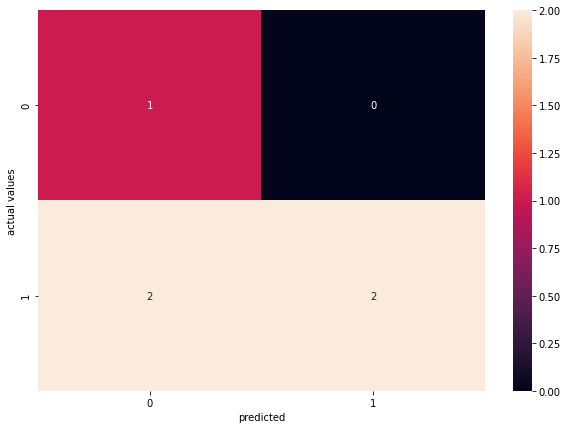

In [80]:
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)
plt.xlabel('predicted')
plt.ylabel('actual values')